In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [14]:
# set db path hackily
data._get_connection("../../data/participants.db")

EXPERIMENT_ID = "05_comprehension_spray-load-construction-meaning"

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid debugL9306E:debugJT1KTE. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid debug867J0M:debugHTHIZK. Status was 1.
Missing datastring for uid debugNVWNGX:debug7T49K6. Status was 1.
Missing datastring for uid debugNVWNGY:debug7T49K6. Status was 1.


In [15]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 0 dupe results.


In [16]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [17]:
# Convert condition_id to independent features
response_df["theme_is_object"] = response_df["condition_0"] == 1
response_df["location_is_heavy"] = response_df["condition_1"] == 1
response_df["theme_is_heavy"] = response_df["condition_2"] == 1

In [18]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [19]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [20]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,theme_is_object,location_is_heavy,theme_is_heavy,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,debug867J0L:debugHTHIZK,0,0,debugHTHIZK,debug867J0L,debugYNMXK2,html-slider-response-with-copout,3395.8,0.0-3.0,2021-09-22 14:59:25.346,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,fill,full,False,False,False,0.911219
4,debug867J0L:debugHTHIZK,0,0,debugHTHIZK,debug867J0L,debugYNMXK2,html-slider-response-with-copout,2544.8,0.0-4.0,2021-09-22 14:59:27.896,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,fill,full,False,False,False,0.911219
5,debug867J0L:debugHTHIZK,0,0,debugHTHIZK,debug867J0L,debugYNMXK2,html-slider-response-with-copout,2002.9,0.0-5.0,2021-09-22 14:59:29.903,05_comprehension_spray-load-construction-meaning,...,NaN,0.0,False,practice,cover,empty,False,False,False,-1.825174
6,debug867J0L:debugHTHIZK,0,0,debugHTHIZK,debug867J0L,debugYNMXK2,html-slider-response-with-copout,2578.6,0.0-6.0,2021-09-22 14:59:32.486,05_comprehension_spray-load-construction-meaning,...,NaN,0.0,False,practice,fill,empty,False,False,False,-1.825174
7,debug867J0L:debugHTHIZK,0,0,debugHTHIZK,debug867J0L,debugYNMXK2,html-slider-response-with-copout,2632.1,0.0-7.0,2021-09-22 14:59:35.123,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,cover,full,False,False,False,0.911219


In [21]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [22]:
N = len(response_df.reset_index().uniqueid.unique())
N

2

### Demo

In [24]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

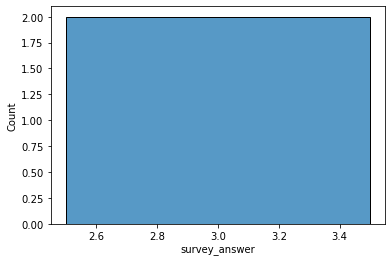

In [25]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [26]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    1
Master's degree      1
Name: survey_answer, dtype: int64

In [27]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    2
Name: survey_answer, dtype: int64

### Comments

In [28]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['thx', '']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

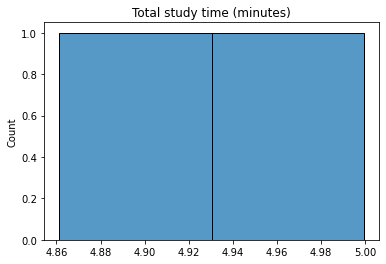

In [29]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [30]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    4.930341
std     0.097544
Name: rt, dtype: float64

### Response times

In [163]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

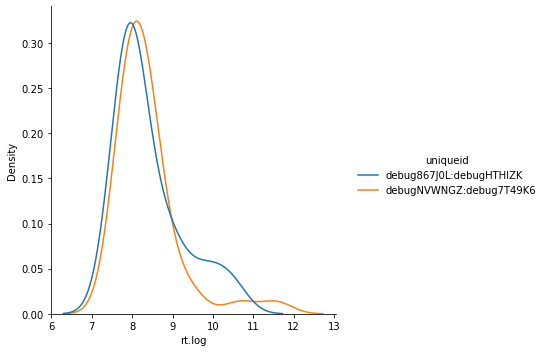

In [31]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [165]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

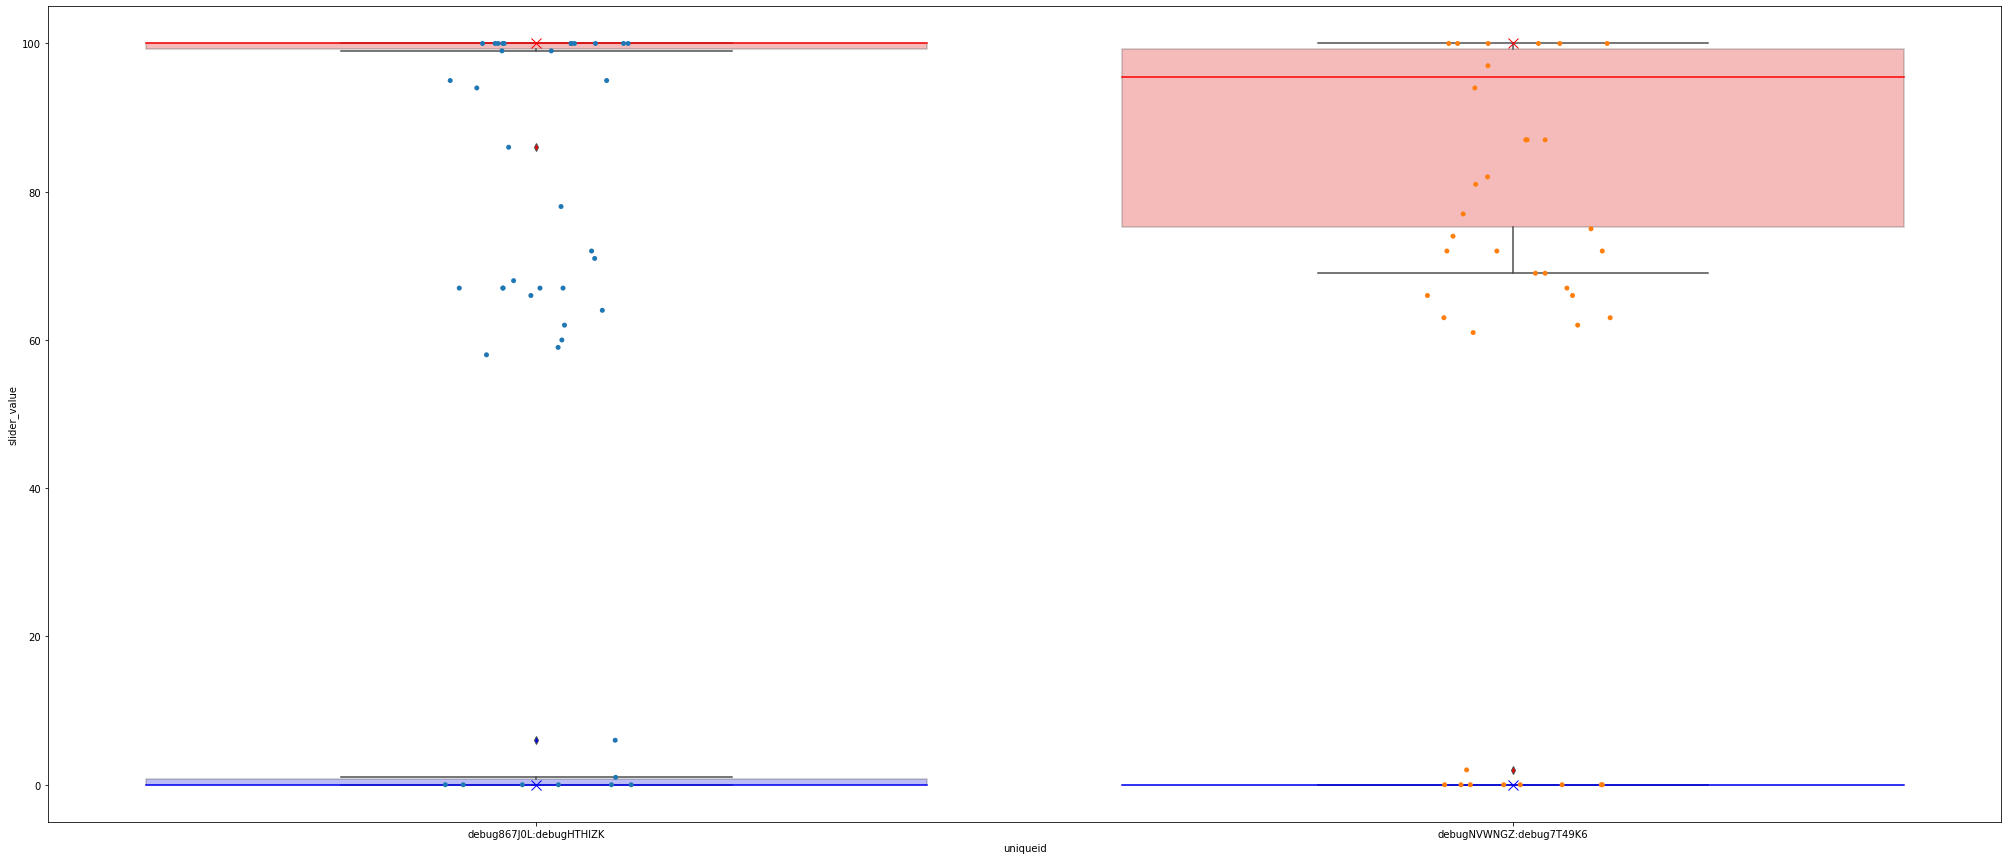

In [32]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [36]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-36-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-36-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [37]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = set()

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [38]:
practice_df.groupby("practice_id").match.mean()

practice_id
coverempty    True
coverfull     True
fillempty     True
fillfull      True
Name: match, dtype: bool

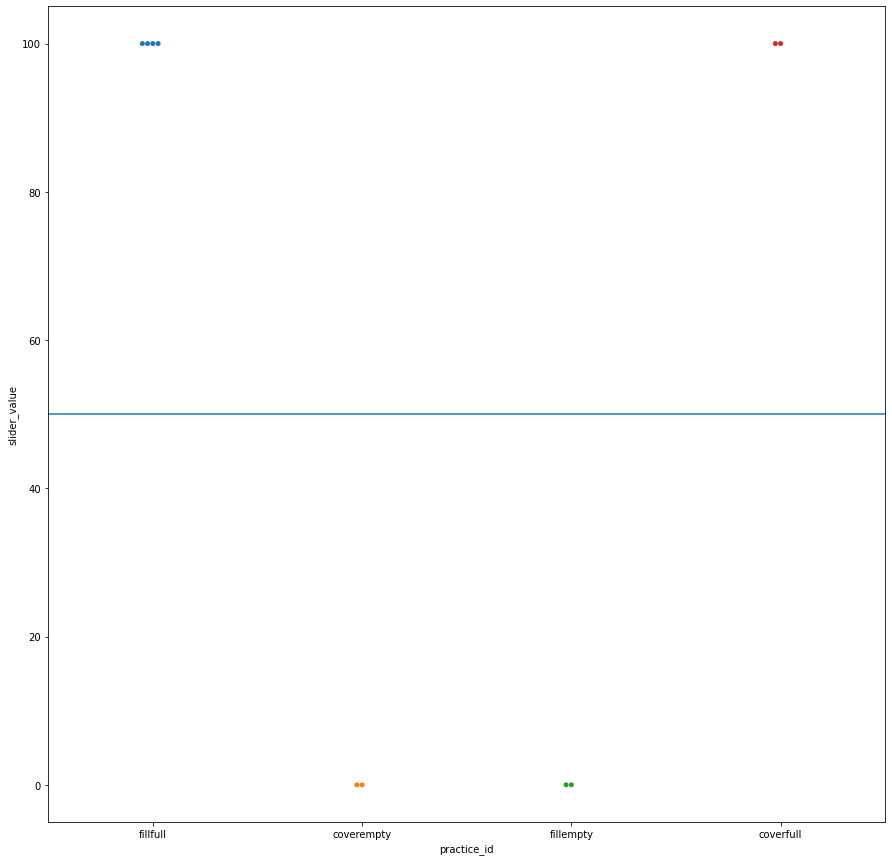

In [39]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [40]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
coverempty,False,2
coverfull,False,2
fillempty,False,2
fillfull,False,4


### Fillers

<AxesSubplot:xlabel='t'>

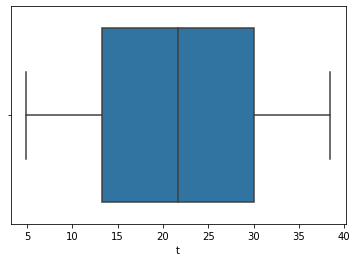

In [41]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [42]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
debugNVWNGZ:debug7T49K6,4.890820,6.316917e-04
debug867J0L:debugHTHIZK,38.447988,3.380211e-12


#### Filler copouts

In [43]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
0.0,empty,False,0,2
1.0,empty,False,0,2
2.0,empty,False,0,2
3.0,empty,False,0,2
4.0,empty,False,0,2
5.0,empty,False,0,2
6.0,full,False,0,2
7.0,full,False,0,2
8.0,full,False,0,2


#### Filler failures by item

In [44]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-44-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [45]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        1.0
             1.0        1.0
             2.0        1.0
             3.0        1.0
             4.0        1.0
             5.0        1.0
full         6.0        1.0
             7.0        1.0
             8.0        1.0
             9.0        0.5
             10.0       1.0
             11.0       1.0
Name: match, dtype: float64

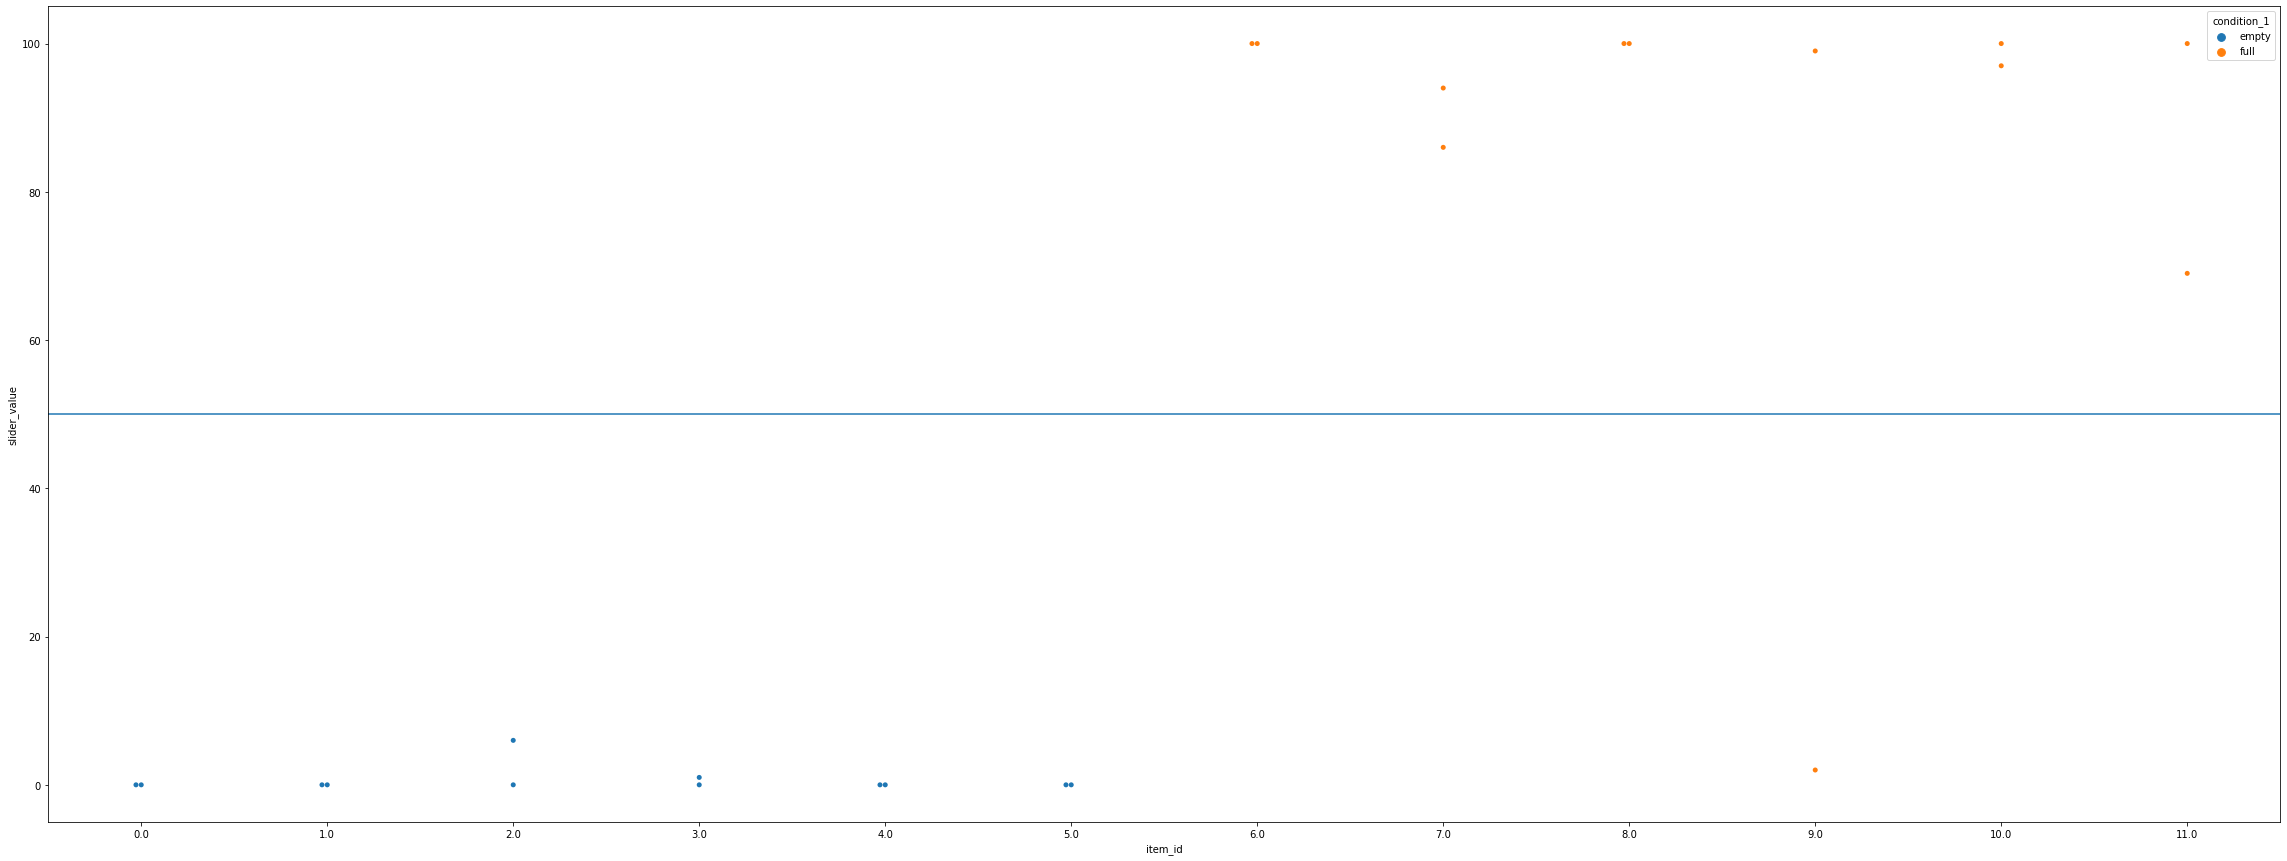

In [46]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [47]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [48]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

0 subjects (0.0%) disqualified and dropped due to failed practice.
	
0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	


In [49]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

2 subjects remaining.


### Merge in materials

In [65]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [66]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [67]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 4 item results because they weren't included in the latest materials, spray-load-002-indefinite.


### Export

In [68]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [74]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "item_key", "T mass?"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

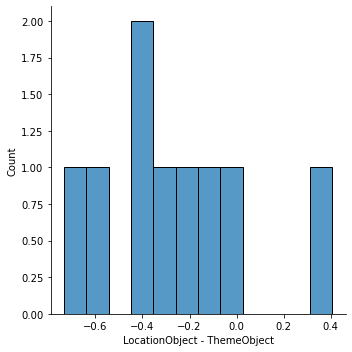

In [75]:
sns.displot(item_differences, bins=12)

In [76]:
item_differences.sort_values(ascending=False)

item_id  item_key                  T mass?
41.0     stuff money               True       0.406813
35.0     squirt water              True      -0.027749
43.0     wrap tape                 True      -0.163508
4.0      dab ointment              True      -0.164647
6.0      drizzle frosting          True      -0.301176
36.0     stack books               False     -0.354631
34.0     sprinkle nuts             False     -0.380722
38.0     stock spices              False     -0.603743
14.0     pack soil                 True      -0.733907
0.0      brush powder              True            NaN
         brush the powder          True            NaN
1.0      cram clothes              True            NaN
         cram the clothes          True            NaN
7.0      dust sugar                True            NaN
         dust the sugar            True            NaN
9.0      heap appetizers           False           NaN
         heap the appetizers       False           NaN
10.0     inject jelly 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'stuff money'),
  Text(1, 0, 'slather mayonnaise'),
  Text(2, 0, 'heap the appetizers'),
  Text(3, 0, 'stack books'),
  Text(4, 0, 'plant lavender seedlings'),
  Text(5, 0, 'inject jelly'),
  Text(6, 0, 'sprinkle nuts'),
  Text(7, 0, 'pack soil'),
  Text(8, 0, 'brush the powder'),
  Text(9, 0, 'drizzle frosting'),
  Text(10, 0, 'spray the paint'),
  Text(11, 0, 'squirt water'),
  Text(12, 0, 'rub marinade'),
  Text(13, 0, 'smear grease'),
  Text(14, 0, 'load hay'),
  Text(15, 0, 'dab ointment'),
  Text(16, 0, 'cram the clothes'),
  Text(17, 0, 'dust the sugar'),
  Text(18, 0, 'wrap tape'),
  Text(19, 0, 'stock spices'),
  Text(20, 0, 'dust sugar'),
  Text(21, 0, 'spray paint'),
  Text(22, 0, 'brush powder'),
  Text(23, 0, 'heap appetizers'),
  Text(24, 0, 'cram clothes')])

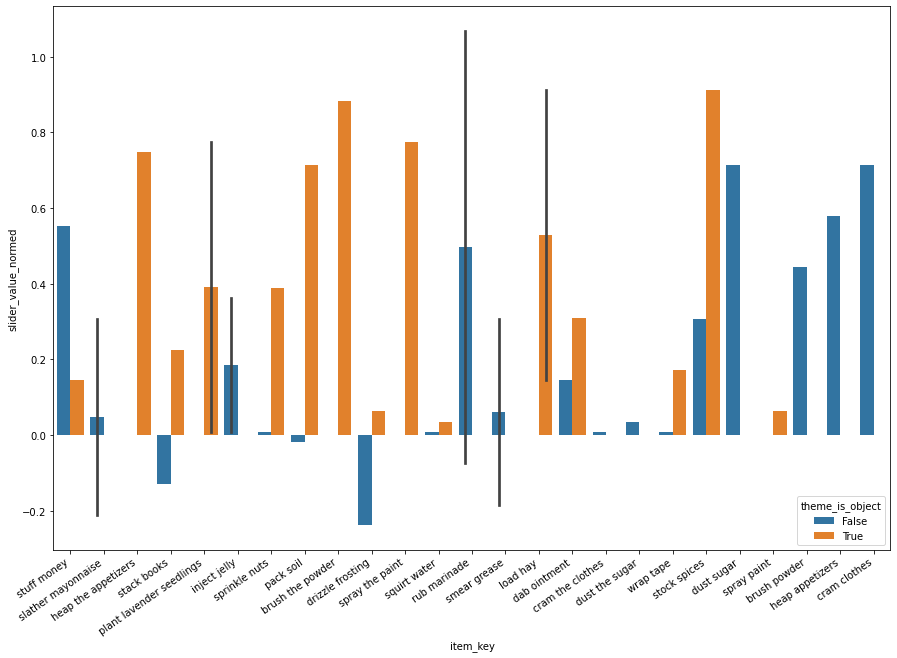

In [77]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="item_key", hue="theme_is_object", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='T mass?', ylabel='LocationObject - ThemeObject'>

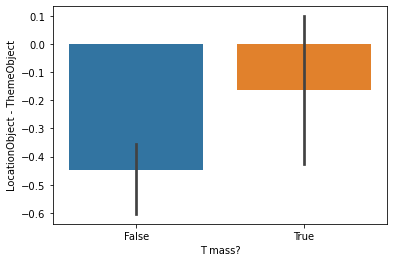

In [78]:
sns.barplot(data=item_differences.reset_index(), x="T mass?", y="LocationObject - ThemeObject")

#### Bootstrap check

In [192]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [193]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [194]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [195]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [196]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [79]:
copouts = merged_df.groupby(["materials_id", "item_id", "theme_is_object"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "theme_is_object"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

,slider_copout,sum,count,mean
item_id,theme_is_object,,,
0.0,True,0,1,0.0
36.0,False,0,1,0.0
41.0,False,0,1,0.0
38.0,False,0,1,0.0
36.0,True,0,1,0.0
35.0,True,0,1,0.0
34.0,True,0,1,0.0
14.0,True,0,1,0.0
9.0,False,0,1,0.0


<AxesSubplot:xlabel='item_key', ylabel='slider_copout'>

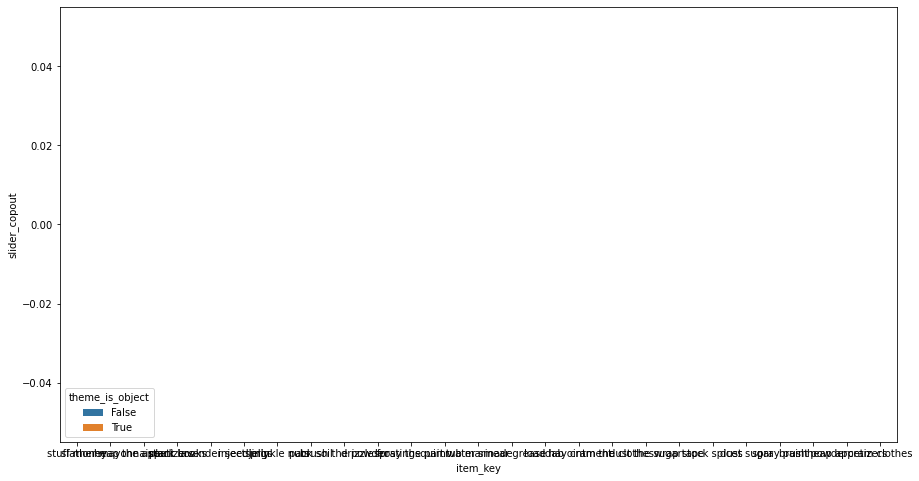

In [81]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="item_key", y="slider_copout", hue="theme_is_object")

<AxesSubplot:xlabel='T mass?', ylabel='slider_copout'>

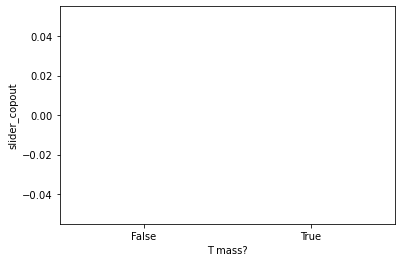

In [82]:
sns.barplot(data=merged_df, x="T mass?", y="slider_copout")

## Item exposure

In [83]:
merged_df.groupby(["item_id", "item_key", "theme_is_object"]).size().sort_values().head(20)

item_id  item_key          theme_is_object
0.0      brush powder      False              1
41.0     stuff money       True               1
                           False              1
38.0     stock spices      True               1
                           False              1
36.0     stack books       True               1
                           False              1
35.0     squirt water      True               1
                           False              1
34.0     sprinkle nuts     True               1
                           False              1
32.0     spray the paint   True               1
         spray paint       True               1
43.0     wrap tape         False              1
14.0     pack soil         True               1
43.0     wrap tape         True               1
7.0      dust sugar        False              1
0.0      brush the powder  True               1
1.0      cram clothes      False              1
         cram the clothes  False             